Compare the model to the DES measured sky brighntesses

In [1]:
%matplotlib inline
import lsst.sims.skybrightness as sb
from lsst.utils import getPackageDir
import lsst.sims.skybrightness_pre as sbp
import numpy as np
import matplotlib.pylab as plt
import os
from lsst.sims.utils import Site

In [3]:
def robustRMS(x):
    iqr = np.percentile(x,75)-np.percentile(x,25)
    rms = iqr/1.349 #approximation
    return rms

In [4]:
telescope = Site(name='CTIO', latitude=-30-10./60.-10.78/3600., longitude=-70.-48./60.-23.49/3600., height=2207.)

/Users/yoachim/gitRepos/sims_utils/python/lsst/sims/utils/Site.py:226: UserWarning: The following attributes of your Site were None:
temperature
pressure
humidity
lapseRate
If you want these to just default to LSST values,
instantiate your Site with name='LSST'
  warnings.warn(msg)


In [5]:
data_path = getPackageDir('sims_skybrightness_data')
data_path = os.path.join(data_path, 'DES/SIMLIB_DUMP_DES-griz.dat')

In [6]:
names = ['rowtxt', 'row', 'libid', 'ra', 'dec', 'mjd', 'filter', 'zp_pe', 'skymag', 'psf_fwhm', 'm5sig']
types = ['|S5', int, float, float, float, float, '|S1', float, float, float, float]
DES_data = np.loadtxt(data_path, dtype=zip(names, types), skiprows=3)

In [7]:
# Switch to radians 
DES_data['ra'] = np.radians(DES_data['ra'])
DES_data['dec'] = np.radians(DES_data['dec'])

In [8]:
# Load up the pre-computed sky brighntess values
sm = sb.SkyModel(mags=True, observatory=telescope)

In [9]:
predicted_mag = np.zeros(DES_data.size, dtype=float)

In [10]:
for i,row in enumerate(DES_data):
    sm.setRaDecMjd(row['ra'], row['dec'], row['mjd'], degrees=False)
    predicted_mag[i] = sm.returnMags()[row['filter']]

/Users/yoachim/lsst/DarwinX86/healpy/1.8.1.lsst2+5/lib/python/healpy-1.8.1-py2.7-macosx-10.5-x86_64.egg/healpy/pixelfunc.py:1045: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if phi == None:


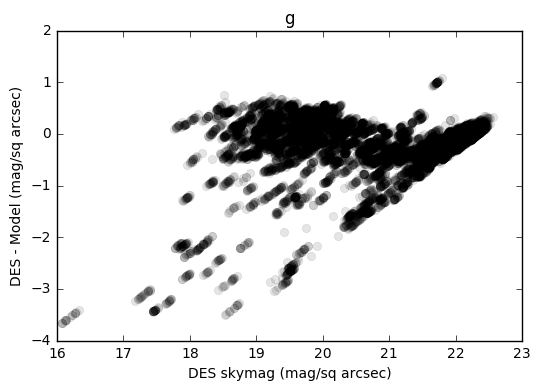

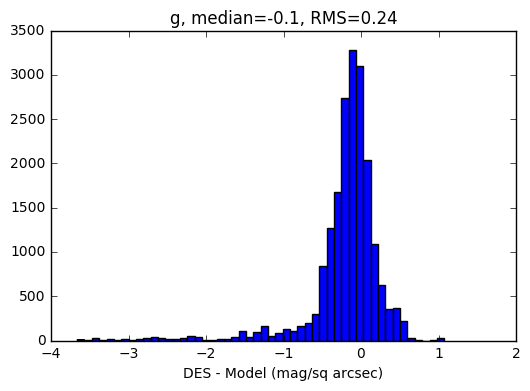

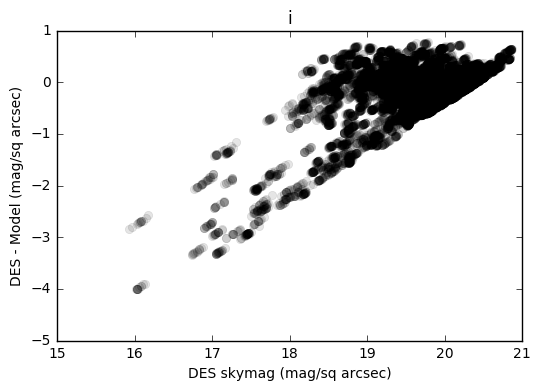

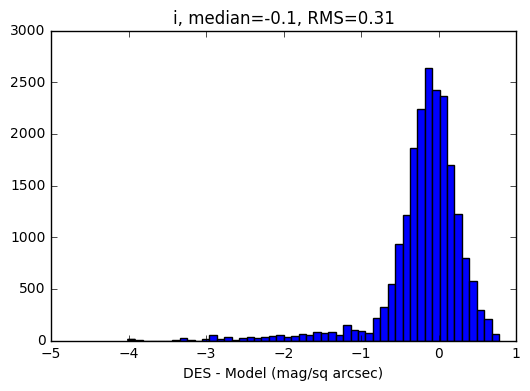

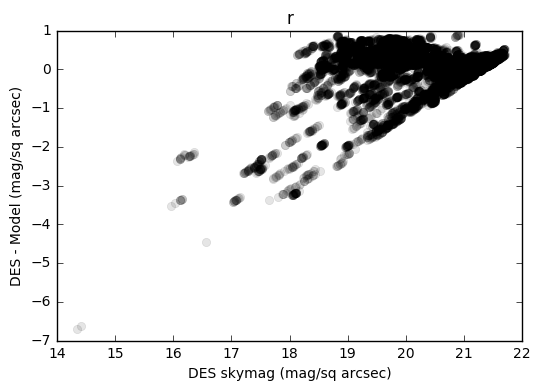

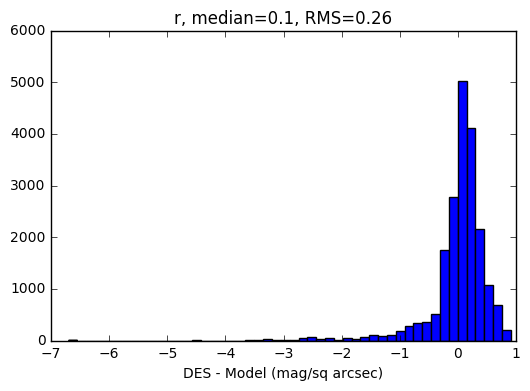

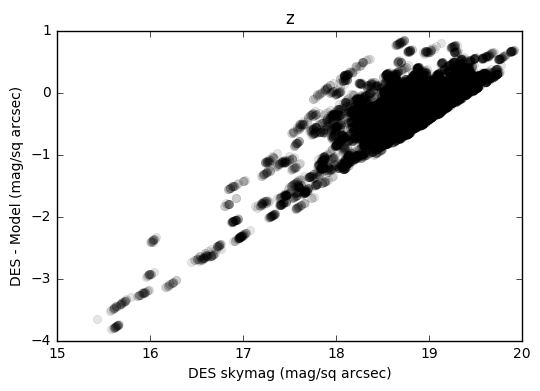

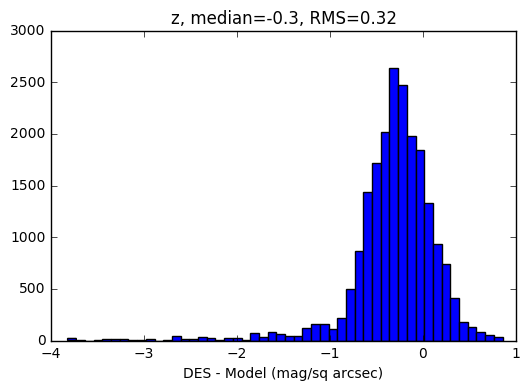

In [15]:
for filtername in np.unique(DES_data['filter']):
    good = np.where(DES_data['filter'] == filtername)
    resids = DES_data['skymag'][good]-predicted_mag[good]
    plt.figure()
    plt.plot(DES_data['skymag'][good], resids, 'ko', alpha=.1)
    plt.title(filtername)
    plt.xlabel('DES skymag (mag/sq arcsec)')
    plt.ylabel('DES - Model (mag/sq arcsec)')
    plt.figure()
    
    ack = plt.hist( resids, bins=50)
    plt.xlabel('DES - Model (mag/sq arcsec)')
    plt.title(filtername+', median=%.1f, RMS=%.2f' % (np.median(resids), robustRMS(resids)))